In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
bank_df = pd.read_csv('bank_data.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1,2,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
2,3,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
3,4,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
4,5,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [3]:
bank_df.shape

(480, 14)

In [4]:
bank_df_slim = bank_df.drop(['ID','Experience','ZIP Code','CCAvg','Personal Loan'],axis=1)
bank_df_slim.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


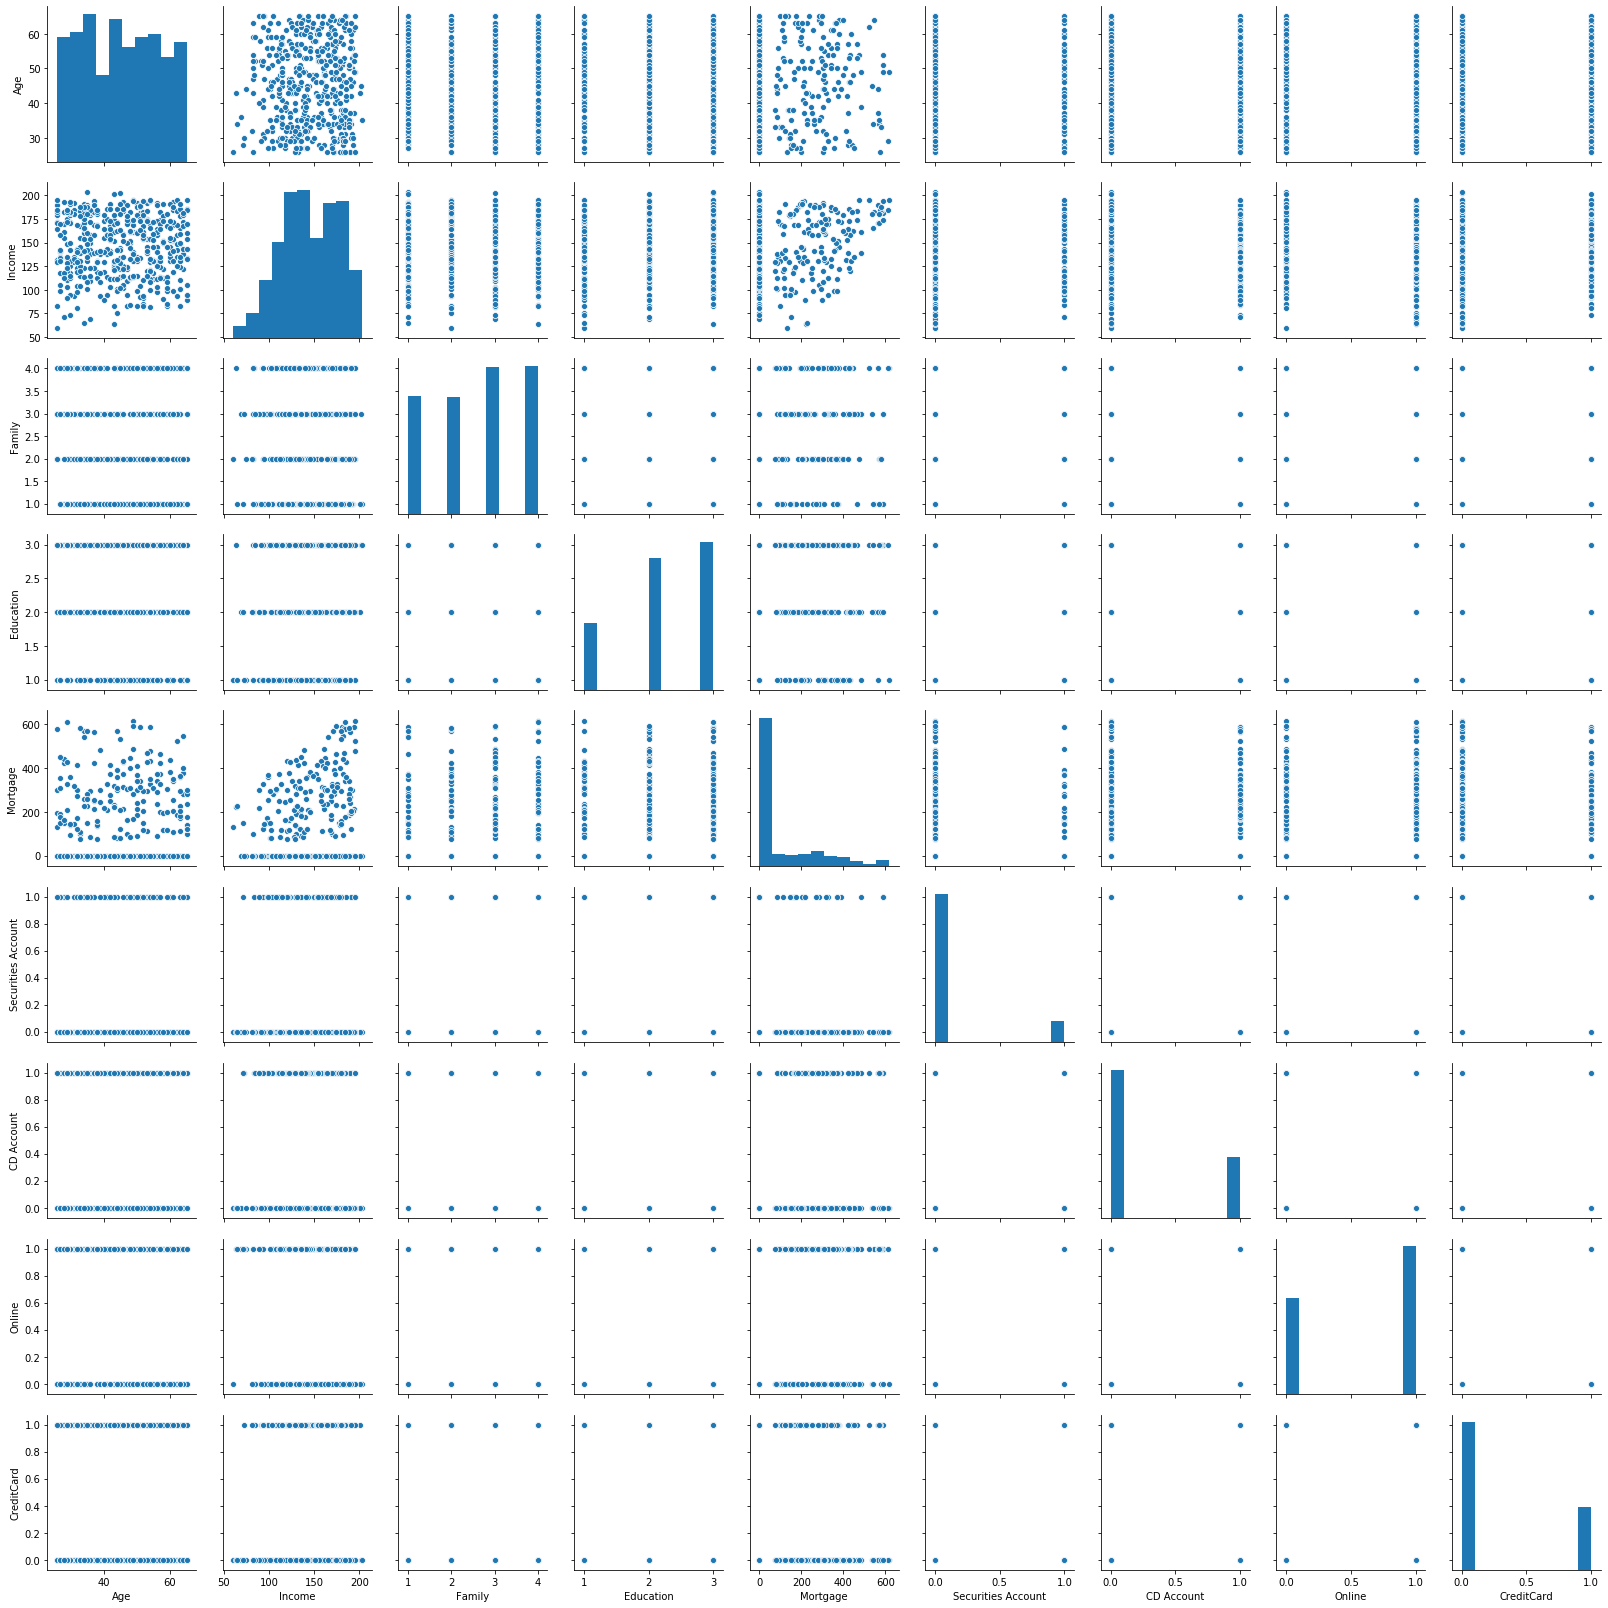

In [5]:
sns.pairplot(bank_df_slim)

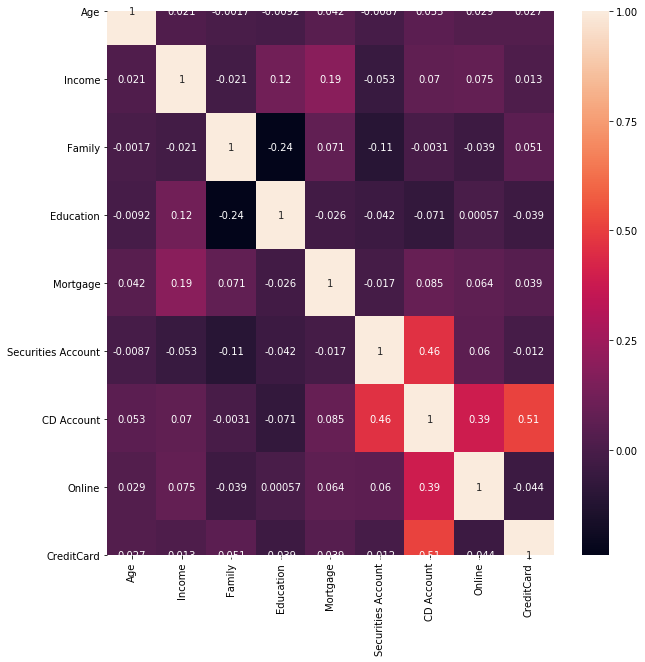

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(bank_df_slim.corr(),annot=True)


In [16]:
X = bank_df_slim.loc[:,bank_df_slim.columns != 'CreditCard']
y = bank_df_slim['CreditCard']

print(X.shape)
print(y.shape)

(480, 8)
(480,)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((336, 8), (144, 8), (336,), (144,))

## Hard Voting

In [22]:
from sklearn.ensemble import VotingClassifier

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
log_cls = LogisticRegression(C=1,solver = 'liblinear')
svc_cls = SVC(C=1,kernel='linear',gamma='auto')
naive_cls = GaussianNB()

### Individual Scores 

In [29]:
for classifier in (log_cls,svc_cls,naive_cls):
    classifier.fit(X_train,y_train)
    print(classifier.__class__.__name__+" Train Score = "+str(classifier.score(X_train,y_train)))
    print(classifier.__class__.__name__+" Test Score = "+str(classifier.score(X_test,y_test)))

LogisticRegression Train Score = 0.8541666666666666
LogisticRegression Test Score = 0.8125
SVC Train Score = 0.8482142857142857
SVC Test Score = 0.7986111111111112
GaussianNB Train Score = 0.8095238095238095
GaussianNB Test Score = 0.7708333333333334


In [30]:
voting_cls_hard = VotingClassifier(estimators=[('lr',log_cls)
                                              ,('svc',svc_cls)
                                              ,('naive',naive_cls)],
                                  voting='hard')

In [31]:
voting_cls_hard.estimators

[('lr',
  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('naive', GaussianNB(priors=None, var_smoothing=1e-09))]

In [32]:
voting_cls_hard.named_estimators

{'lr': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'svc': SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'naive': GaussianNB(priors=None, var_smoothing=1e-09)}

In [35]:
voting_cls_hard.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma='auto', kernel='linear',
                          

In [36]:
voting_cls_hard.score(X_test,y_test)

0.8125


## Soft Voting

In [40]:
log_pre_prob=log_cls.predict_proba(X_test)
log_pre_prob

array([[0.95111233, 0.04888767],
       [0.95606041, 0.04393959],
       [0.27248398, 0.72751602],
       [0.95453287, 0.04546713],
       [0.29489359, 0.70510641],
       [0.76947656, 0.23052344],
       [0.74819244, 0.25180756],
       [0.73233324, 0.26766676],
       [0.7071038 , 0.2928962 ],
       [0.67208536, 0.32791464],
       [0.82295152, 0.17704848],
       [0.25023049, 0.74976951],
       [0.92658337, 0.07341663],
       [0.25338752, 0.74661248],
       [0.68145361, 0.31854639],
       [0.74613353, 0.25386647],
       [0.94554135, 0.05445865],
       [0.79398731, 0.20601269],
       [0.95194073, 0.04805927],
       [0.93850053, 0.06149947],
       [0.27735517, 0.72264483],
       [0.75185843, 0.24814157],
       [0.782832  , 0.217168  ],
       [0.78780524, 0.21219476],
       [0.26403912, 0.73596088],
       [0.96288821, 0.03711179],
       [0.2515572 , 0.7484428 ],
       [0.74346614, 0.25653386],
       [0.73696315, 0.26303685],
       [0.95509257, 0.04490743],
       [0.

In [45]:

svc_cls = SVC(C=1,kernel='linear',gamma='auto',probability=True)
svc_cls.fit(X_train,y_train)
svc_pre_prob=svc_cls.predict_proba(X_test)
svc_pre_prob

array([[0.82875975, 0.17124025],
       [0.82877748, 0.17122252],
       [0.15018   , 0.84982   ],
       [0.82877581, 0.17122419],
       [0.15016615, 0.84983385],
       [0.82837689, 0.17162311],
       [0.82838754, 0.17161246],
       [0.82836383, 0.17163617],
       [0.82841016, 0.17158984],
       [0.82833838, 0.17166162],
       [0.82849006, 0.17150994],
       [0.15022557, 0.84977443],
       [0.82860907, 0.17139093],
       [0.15023839, 0.84976161],
       [0.82837311, 0.17162689],
       [0.82840764, 0.17159236],
       [0.8287053 , 0.1712947 ],
       [0.82841765, 0.17158235],
       [0.82880689, 0.17119311],
       [0.82861352, 0.17138648],
       [0.15021534, 0.84978466],
       [0.82839424, 0.17160576],
       [0.82843141, 0.17156859],
       [0.82847276, 0.17152724],
       [0.15028936, 0.84971064],
       [0.99241392, 0.00758608],
       [0.15028019, 0.84971981],
       [0.82839156, 0.17160844],
       [0.82839598, 0.17160402],
       [0.82867131, 0.17132869],
       [0.

In [46]:
naive_pre_prob=naive_cls.predict_proba(X_test)
naive_pre_prob

array([[0.88877808, 0.11122192],
       [0.87139971, 0.12860029],
       [0.14289971, 0.85710029],
       [0.90172218, 0.09827782],
       [0.15748933, 0.84251067],
       [0.90270122, 0.09729878],
       [0.90157313, 0.09842687],
       [0.89797152, 0.10202848],
       [0.87188052, 0.12811948],
       [0.1787045 , 0.8212955 ],
       [0.90209509, 0.09790491],
       [0.10761389, 0.89238611],
       [0.91438836, 0.08561164],
       [0.11879147, 0.88120853],
       [0.21118503, 0.78881497],
       [0.20505185, 0.79494815],
       [0.90603248, 0.09396752],
       [0.90956759, 0.09043241],
       [0.80115968, 0.19884032],
       [0.91343169, 0.08656831],
       [0.16100482, 0.83899518],
       [0.91554983, 0.08445017],
       [0.90631983, 0.09368017],
       [0.26563566, 0.73436434],
       [0.07393761, 0.92606239],
       [0.93275206, 0.06724794],
       [0.08294332, 0.91705668],
       [0.90459608, 0.09540392],
       [0.22520248, 0.77479752],
       [0.90991367, 0.09008633],
       [0.

In [47]:
voting_cls_soft = VotingClassifier(estimators=[('log',log_cls),('svc',svc_cls),('naive',naive_cls)],
                                  voting='soft',
                                  weights=[0.4,0.3,0.3])

In [49]:
voting_cls_soft.fit(X_train,y_train)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3, gamma='auto', kernel='linear',
                         

In [50]:
voting_cls_soft.score(X_test,y_test)

0.8125